## Exploratory Data Analysis of Google App's Ratings

### Content

Each app (row) has values for catergory, rating, size, and more.

### Information about the Dataset

This information is scraped from the Google Play Store. This app information would not be available without it.

### Dataset Source

https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv

## Download the Dataset

##### opendatasets is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.

Install the library using pip :

In [1]:
pip install opendatasets --upgrade

Note: you may need to restart the kernel to use updated packages.


Datasets can be downloaded within a Jupyter notebook or Python script using the opendatasets.download helper function. 

dataset_url can also point to a public Google Drive link or a raw file URL.

opendatasets uses the Kaggle Official API for donwloading dataset from Kaggle.
Requires kaggle's user name and kaggle's API key.

In [2]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv'
od.download(dataset_url)

Skipping, found downloaded files in ".\google-play-store-apps" (use force=True to force download)


In [3]:
import os
os.listdir('./google-play-store-apps')

['googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'license.txt']

In [4]:
data_filename = './google-play-store-apps/googleplaystore.csv'

## Preparation and Cleaning the Data

To get the information from any data first need to do some preparation and cleaning the data

- Load the file using pandas library
- look at some information about the data and from the columns.
- To get some numerical information from the data using numpy library.
- Fix any missing or incorrect values.

In [5]:
# import some necessary dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read the Data

In [6]:
google_data_df = pd.read_csv(data_filename)

In [7]:
google_data_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [8]:
# type of the dataset
type(google_data_df)

pandas.core.frame.DataFrame

In [9]:
# Information about the data columns
google_data_df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
# first five rows
google_data_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
# shape of the dataset
google_data_df.shape

(10841, 13)

The given dataset only have one numerical column Rating

In [12]:
# Quick Statistical Information about the dataset
google_data_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

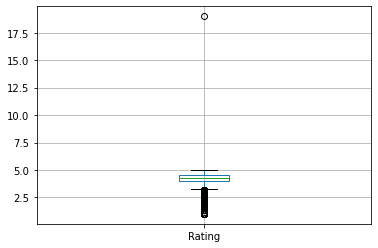

In [13]:
# create a boxplot
google_data_df.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

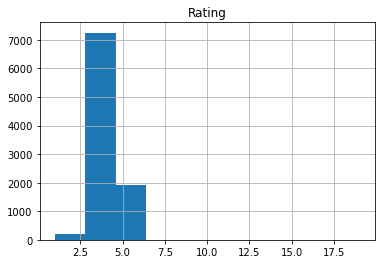

In [14]:
# build a histogram to find the pattern of the dataset
google_data_df.hist()

The above plot shows that the rating concentrated from 3.9 to 4.7 approximately.

#### Clean the dataset

###### Count the number of missing values in the Dataframe

In [15]:
google_data_df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# count the number of missing values in each column
google_data_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:
# Check how many ratings are more than 5 - Outliers
google_data_df[google_data_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [18]:
# Check some top and bottom values of the outliers
google_data_df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


In [19]:
# Not Find anything interesting, so just drop the outlier
google_data_df.drop([10472], inplace=True)
google_data_df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


<AxesSubplot:>

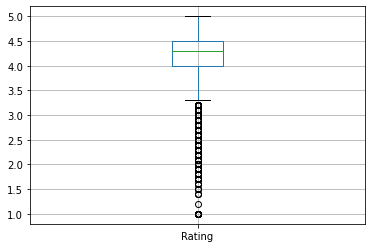

In [20]:
# Create another boxplot
google_data_df.boxplot()

From this above plot we see that some values are located from 1 to 3.5, but most of the values are between 4 to 4.5. 

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

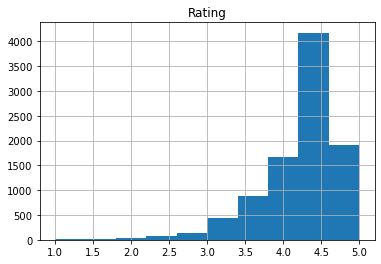

In [21]:
# Draw a hisrogram
google_data_df.hist()

Now that shows a nice pattern about the data.

##### Remove columns that are 90% empty

In [22]:
# 10% of rows of the Dataset
threshold = len(google_data_df)*0.1
threshold

1084.0

In [23]:
# Drop values that have not 10% of data
google_data_df.dropna(thresh=threshold, axis=1, inplace=True)

In [24]:
print(google_data_df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


###### Data Imputation and Manipulation

Fill the null values with appropriate values using <span style="font-weight:bold">aggregate function</span>, like mean, median or mode


To Fill the missing data, we use the mode for categorical data and median values for numerical data, because our dataset is Right skewed.

#### Define a function called fill_median, that fill the missing values with median values

In [25]:
def fill_median(series):
    return series.fillna(series.median())

In [26]:
# Now fill the missing values with median values 
google_data_df.Rating = google_data_df['Rating'].transform(fill_median)

In [27]:
# Count the number of null values in each column
google_data_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

All the empty data of Rating Column filled with median value.

In [28]:
# modes of categorical values
print(google_data_df['Type'].mode())
print(google_data_df['Current Ver'].mode())
print(google_data_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [29]:
# Fill the missing categorical values with mode
google_data_df['Type'].fillna(str(google_data_df['Type'].mode().values[0]), inplace=True)
google_data_df['Current Ver'].fillna(str(google_data_df['Current Ver'].mode().values[0]), inplace=True)
google_data_df['Android Ver'].fillna(str(google_data_df['Android Ver'].mode().values[0]), inplace=True)

In [30]:
# Count the number of null values in each column
google_data_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now convert the the Price, Reviews and Ratings values into Numerical Values, so that can do some analysis on those data.

In [31]:
# Convert Price, Reviews and Ratings values into numerical values
google_data_df['Price'] = google_data_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google_data_df['Price'] = google_data_df["Price"].apply(lambda x: float(x))
google_data_df['Reviews'] = pd.to_numeric(google_data_df['Reviews'], errors='coerce')

In [32]:
google_data_df['Installs'] = google_data_df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data_df['Installs'] = google_data_df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google_data_df['Installs'] = google_data_df['Installs'].apply(lambda x: float(x))

In [33]:
google_data_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
google_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


In [35]:
# After cleaning check athe statistical information of the dataset
google_data_df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


### Data Visualization

In [36]:
# Group the values
group = google_data_df.groupby('Category')
rating = group['Rating'].agg(np.mean)
price = group['Price'].agg(np.sum)
reviews = group['Reviews'].agg(np.mean)
print(rating)
print(price)
print(reviews)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

Text(0, 0.5, 'Rating')

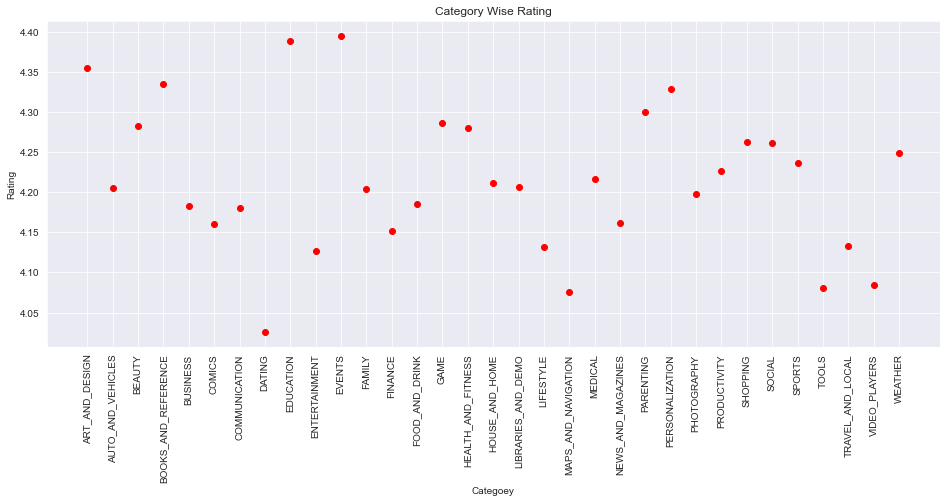

In [37]:
# Category wise Rating
plt.figure(figsize=(16,6))
sns.set_style('darkgrid')
plt.plot(rating,'ro')
plt.xticks(rotation=90)
plt.title('Category Wise Rating')
plt.xlabel('Categoey')
plt.ylabel('Rating')

Text(0, 0.5, 'Price')

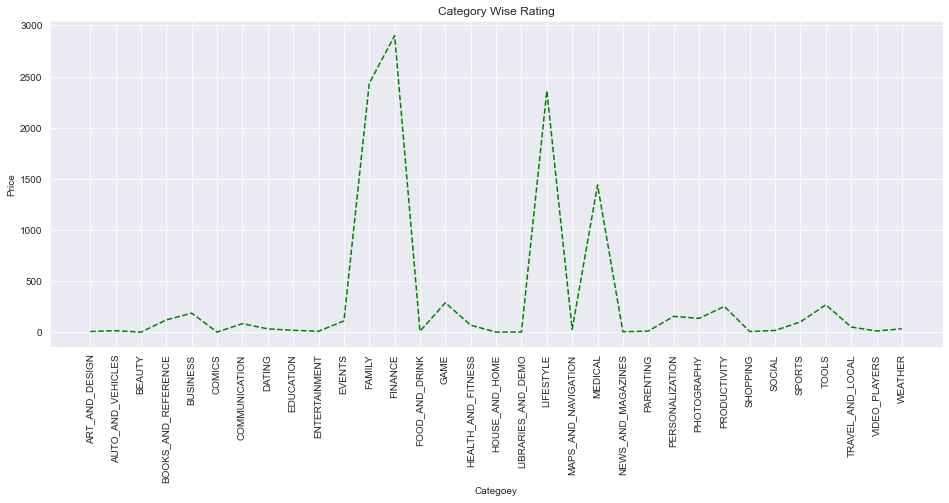

In [38]:
# Category wise Pricing
plt.figure(figsize=(16,6))
sns.set_style('darkgrid')
plt.plot(price,'r--', color='g')
plt.xticks(rotation=90)
plt.title('Category Wise Rating')
plt.xlabel('Categoey')
plt.ylabel('Price')

Text(0, 0.5, 'Reviews')

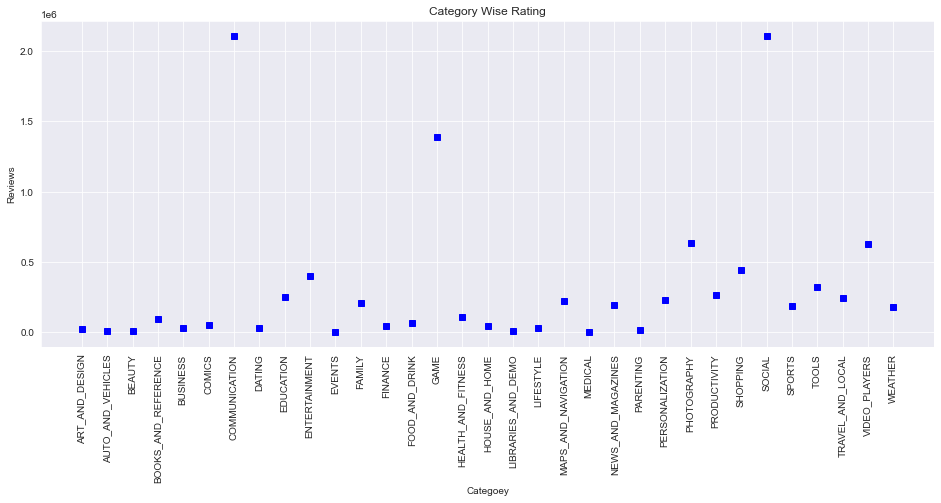

In [39]:
# Category wise Reviews
plt.figure(figsize=(16,6))
sns.set_style('darkgrid')
plt.plot(reviews,'s', color='b')
plt.xticks(rotation=90)
plt.title('Category Wise Rating')
plt.xlabel('Categoey')
plt.ylabel('Reviews')

## Conclusion

In this dataset, finds lots of missing and null values. So fill those values properly. Make some changes on the dataset structure, convert some categorical values into numerical values for analysis and visualization.

From the above analysis find that in which category the apps gets more reviews, in which category the app's price are high and in which categorythe app price is low.

Using some statistical values such as mean,median and mode.

Using lambda function for data conversion.

## Inspiration and Future Works

The Play Store apps data has enormous potential to drive app-making businesses to success. By this analysis anyone can find in which category app making is more benefical or not.

In [40]:
pip install jovian --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [44]:
import jovian
jovian.commit(project='Exploratory Data Analysis of Google Apps Ratings')

<IPython.core.display.Javascript object>

[jovian] Creating a new project "joybarai09/Exploratory Data Analysis of Google Apps Ratings"
[jovian] Committed successfully! https://jovian.ai/joybarai09/exploratory-data-analysis-of-google-apps-ratings


'https://jovian.ai/joybarai09/exploratory-data-analysis-of-google-apps-ratings'